In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
sns.set(font_scale=1.5)

## Análise de categorias do Doaj (10% da base)

In [2]:
filename = 'sample_processed_doaj_600k'
df = pd.read_json(filename+'.json', lines=True)
print(len(df))
df.head()

600000


,title,abstract,year,subjects
0,DEGENERACIÓN MACULAR RELACIONADA CON LA EDAD. ...,Se realizó un estudio transversal descriptivo ...,2006,"[Medicine, Medicine (General)]"
1,Data regarding active psychosis and functional...,This article describes data related to the res...,2020,[Computer applications to medicine. Medical in...
2,Enseñanza y difusión sobre el uso de recursos ...,El presente artículo analiza el caso de un Cur...,2018,"[Education, Education (General)]"
3,Development of an Expert System as a Diagnosti...,Cervical cancer is the second largest cause of...,2013,[Computer applications to medicine. Medical in...
4,Realizing Serine/Threonine Ligation: Scope and...,Serine/Threonine ligation (STL) has emerged as...,2014,[Chemistry]


In [4]:
# Cria o dict zerado
subjects_count = {}
for _, row in tqdm(df.iterrows()):
    for topic in row['subjects']:
        subjects_count[topic] = 0

600000it [00:48, 12350.11it/s]


In [6]:
# Incrementa toda vez que encontrar elemento da lista
for _, row in tqdm(df.iterrows()):
    for topic in row['subjects']:
        subjects_count[topic] += 1

600000it [00:49, 12097.72it/s]


In [52]:
tab_agg = {'subjects': subjects_count.keys(),
           'num_abstracts_10p': subjects_count.values(),
           'num_abstracts_aprx': [e*10 for e in subjects_count.values()]}

subject_df = pd.DataFrame.from_dict(tab_agg).sort_values(by='num_abstracts_aprx', ascending=False)
subject_df

,subjects,num_abstracts_10p,num_abstracts_aprx
0,Medicine,77361,773610
33,Science,46007,460070
1,Medicine (General),25304,253040
11,Biology (General),24585,245850
24,Engineering (General). Civil engineering (Gene...,19677,196770
...,...,...,...
490,Municipal refuse. Solid wastes,2,20
491,Standardization. Simplification. Waste,2,20
488,Trade associations,1,10
486,Encyclopedias,1,10


In [53]:
subject_df['num_abstracts_aprx'].describe()

count       492.000000
mean      17890.162602
std       50394.822108
min          10.000000
25%         757.500000
50%        3035.000000
75%       16122.500000
max      773610.000000
Name: num_abstracts_aprx, dtype: float64

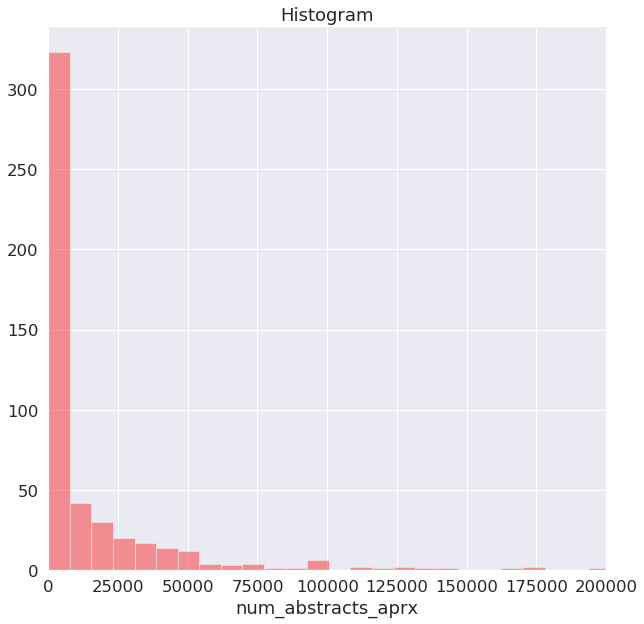

In [55]:
# Histogram do tempo até o churn daquele alunos que saíram
plt.figure(figsize=(10, 10))
plt.title('Histogram')
sns.distplot(subject_df['num_abstracts_aprx'], bins=100, norm_hist=False, kde=False, color='red')
plt.xlim([0, 200000])
plt.show()

In [68]:
subject_df.head(20)

,subjects,num_abstracts_10p,num_abstracts_aprx
0,Medicine,77361,773610
33,Science,46007,460070
1,Medicine (General),25304,253040
11,Biology (General),24585,245850
24,Engineering (General). Civil engineering (Gene...,19677,196770
6,Chemistry,17447,174470
23,Technology,17152,171520
10,Public aspects of medicine,16501,165010
26,Social Sciences,14561,145610
124,Environmental sciences,13745,137450


In [56]:
len(subject_df.loc[subject_df['num_abstracts_aprx']>100000])/len(subject_df)

0.03048780487804878

No handles with labels found to put in legend.


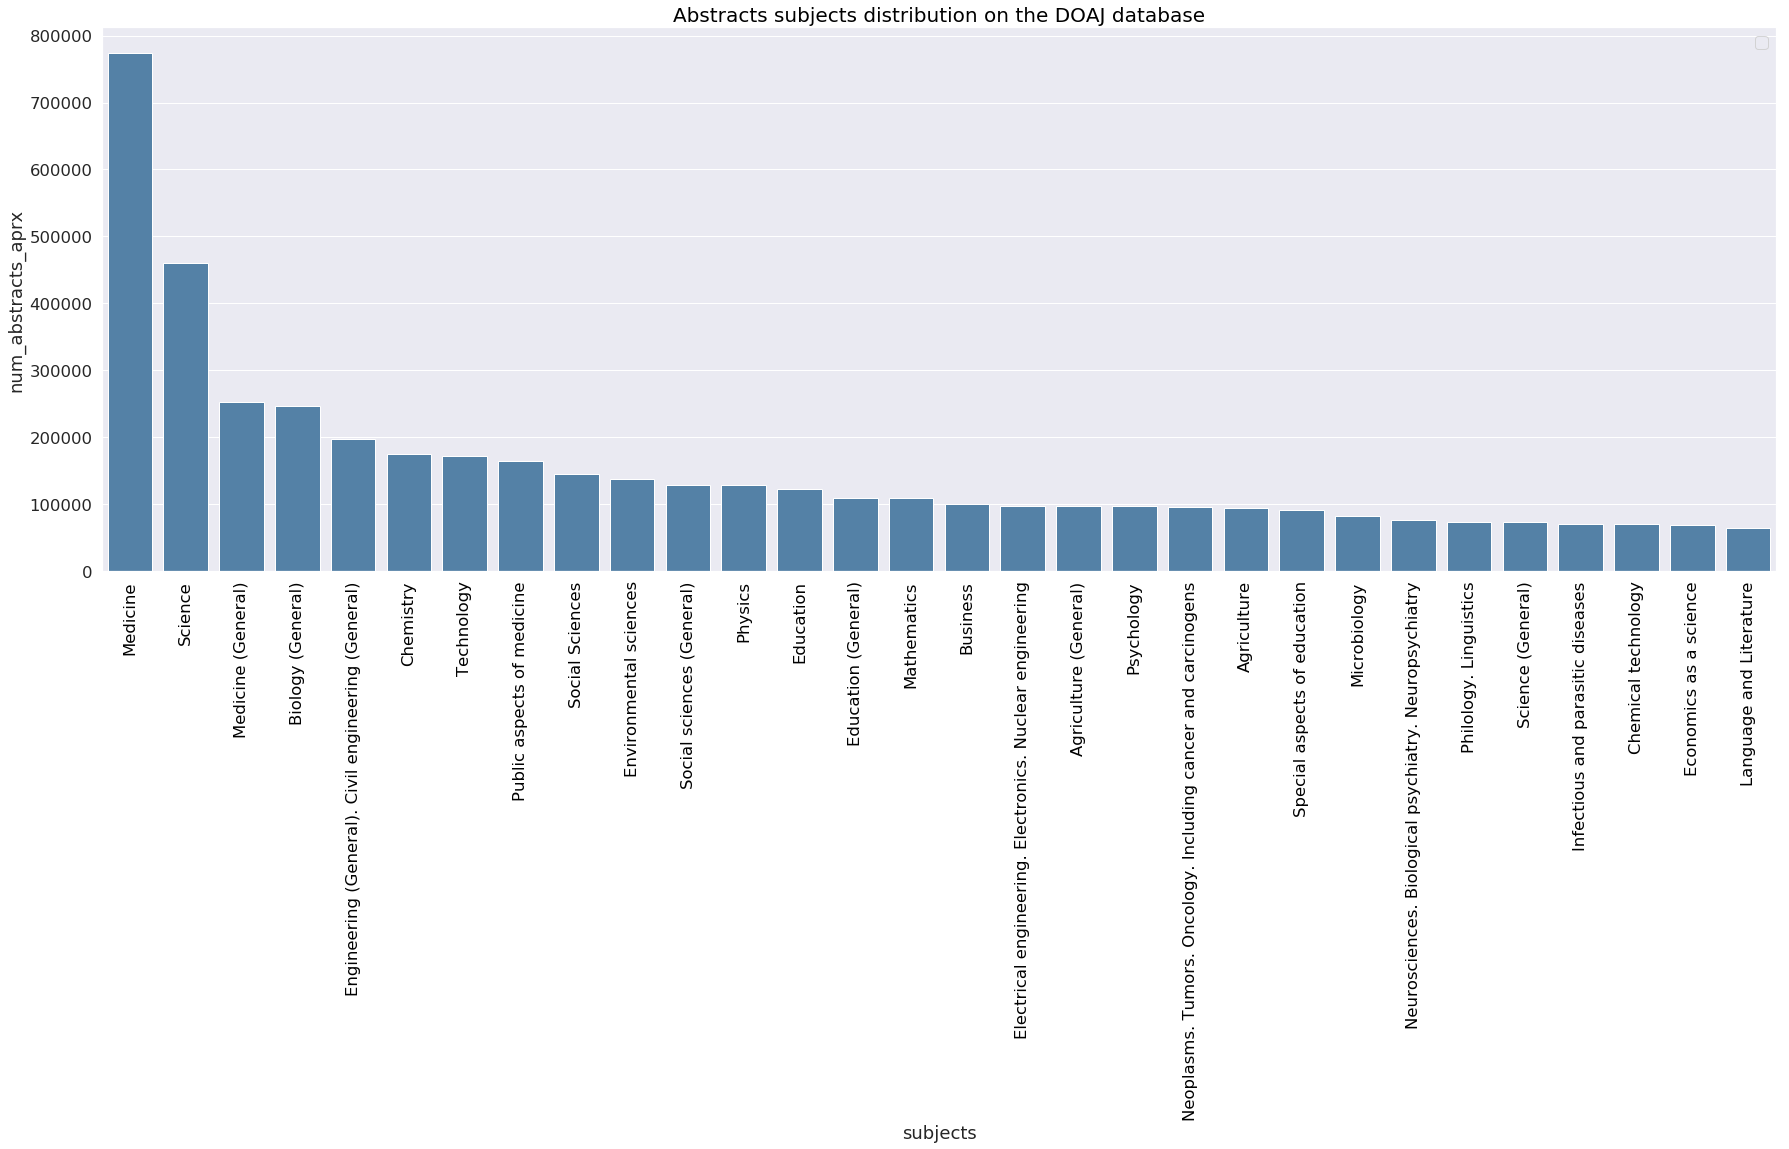

In [80]:
plt.figure(figsize=(30, 10))
plt.title('Abstracts subjects distribution on the DOAJ database', color='black', size=20)
plt.xticks(color='black', rotation=90)
sns.barplot(x='subjects', y='num_abstracts_aprx', data=subject_df.head(30), color='steelblue')
plt.legend(loc='upper right')
plt.show()